In [20]:
# from pyspark.sql import SparkSession
# import pyspark.pandas as ps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
path_to_data = '/mmfs1/gscratch/amath/dob1998/emissions_forecasting/data/IOT_pxp/'
path_to_save = '/mmfs1/gscratch/amath/dob1998/emissions_forecasting/'

In [21]:
iot1995 = pd.read_csv(path_to_data + 'IOT_1995_pxp/Z.txt', header = [0,1], index_col = [0,1], sep='\t')
# df = pd.read_csv('test.csv',header = [0,1], index_col = [0,1], sep='\t')

In [3]:
log_iot1995 = np.log10(iot1995 + 1)
iot_max = np.max(log_iot1995)

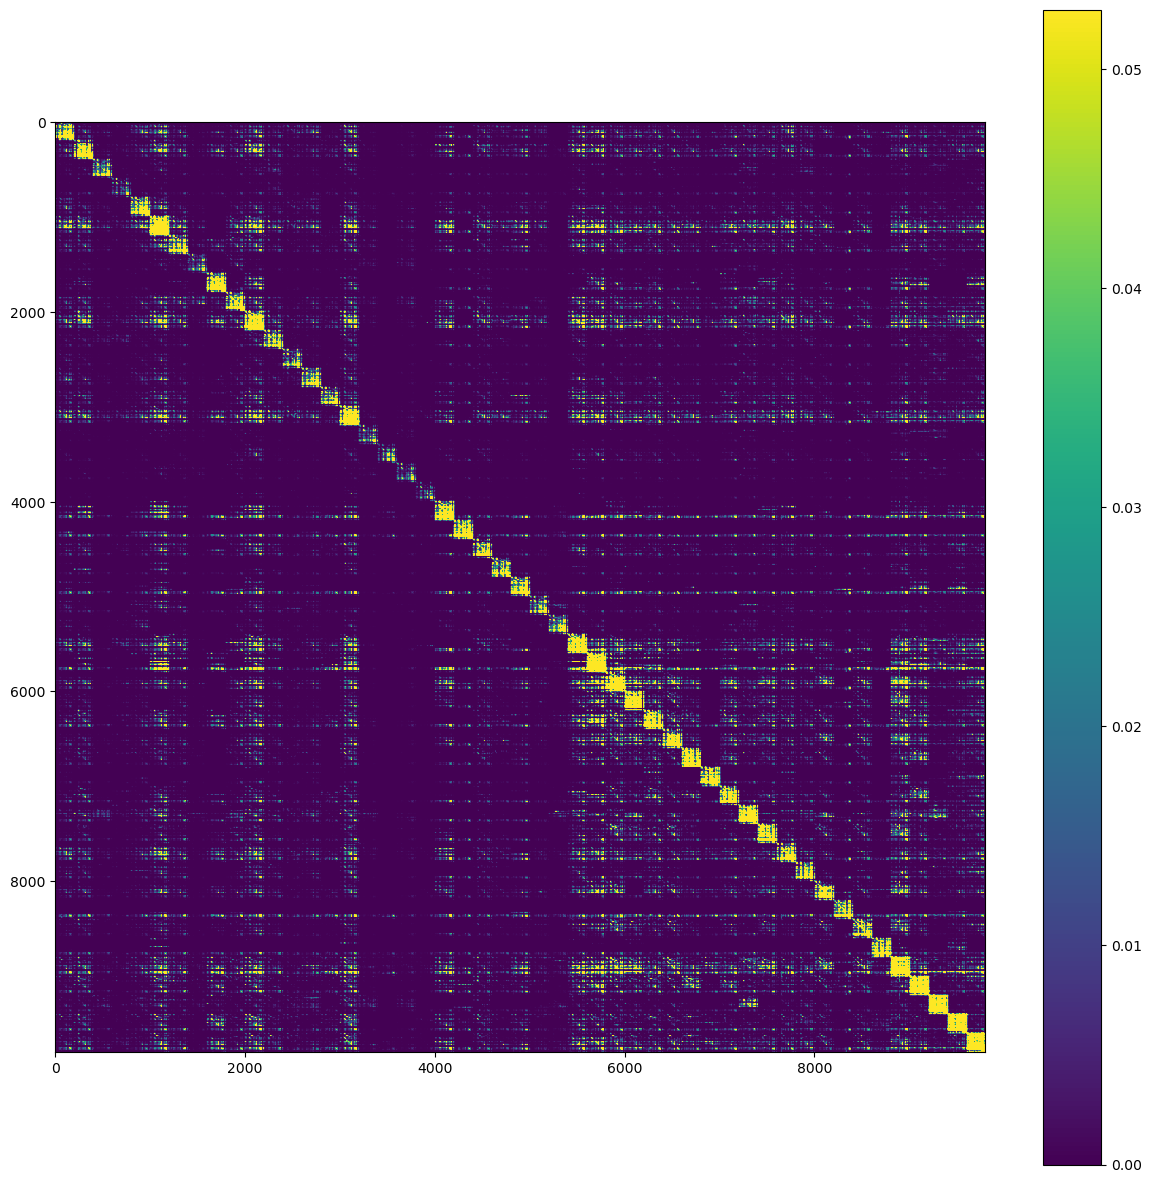

In [4]:
plt.figure(figsize=(15, 15))
plt.imshow(log_iot1995,vmax=iot_max/100)
plt.colorbar()
plt.show()

In [5]:
# inc = 0
# for el in iot1995.loc['AT','AT'].index:
#     print(str(inc) + ': ' + el)
#     inc +=1

In [6]:
idx = iot1995.loc['AT','AT'].index
clm = iot1995.loc['AT','AT'].columns

Farming and Agriculture:                0-18

Primary Fossil Fuels:                   19-30

Ores and Mineral:                       31-41

Food Products and Tobacco:              42-53

Fabric and Paper Products:              54-62   

Secondary Fossil Fuels for Combustion:  63-77



In [7]:
grouped_iot1995 = iot1995.groupby(level = 'sector', axis = 1).sum()
grouped_iot1995 = grouped_iot1995.groupby(level = 'sector').sum()

/tmp/ipykernel_90787/3543687232.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  grouped_iot1995 = iot1995.groupby(level = 'sector', axis = 1).sum()


In [8]:
grouped_iot1995 = grouped_iot1995.reindex(index = idx, columns = clm)

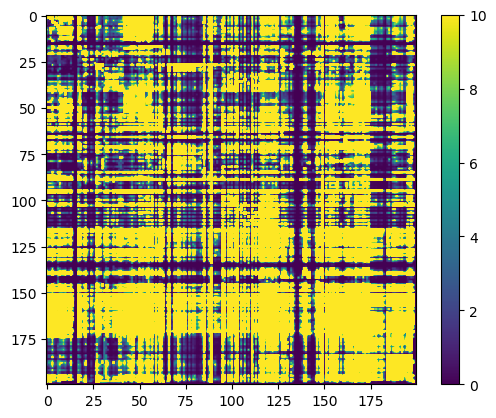

In [9]:
# temp.head()
plt.imshow(grouped_iot1995,vmax=10)
plt.colorbar()
plt.show()

In [10]:
U, S, Vt = np.linalg.svd(grouped_iot1995, full_matrices=False)

In [11]:
r = 0
k = 5
lr_grouped_iot1995 = U[:,r:k] @ np.diag(S[r:k]) @ Vt[r:k,:]

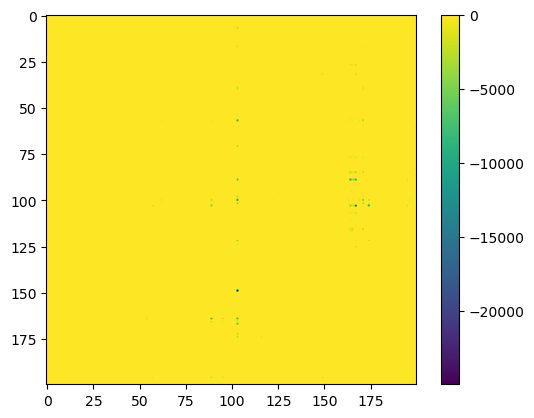

In [12]:
plt.imshow(lr_grouped_iot1995,vmax=10)
plt.colorbar()
plt.show()

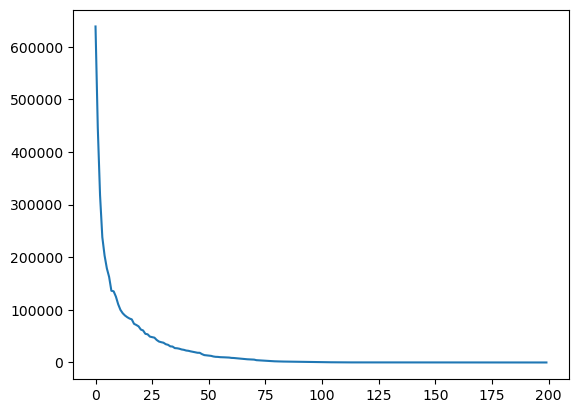

In [14]:
plt.plot(S)
# plt.plot(np.log10(S))

In [15]:
temp = grouped_iot1995.to_numpy()
nmf_model = NMF(tol = 1e-7, max_iter = 1000)

In [16]:
W = nmf_model.fit_transform(temp)
H = nmf_model.components_

/mmfs1/gscratch/amath/dob1998/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1200: FutureWarning: The default value of `n_components` will change from `None` to `'auto'` in 1.6. Set the value of `n_components` to `None` explicitly to suppress the warning.
  warnings.warn(
/mmfs1/gscratch/amath/dob1998/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


In [25]:
r = 0
k = 100
wh_grouped_iot1995 = W[:,r:k] @ H[r:k,:]

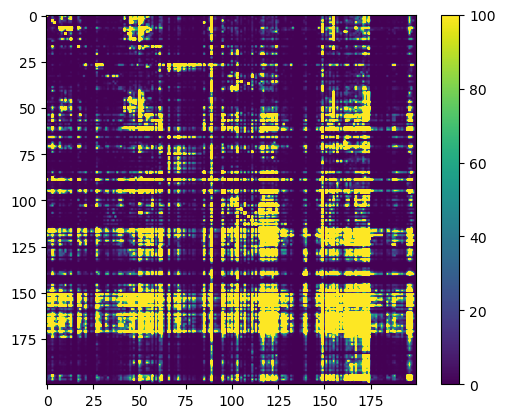

In [26]:
plt.imshow(wh_grouped_iot1995,vmax=100)
plt.colorbar()
plt.show()

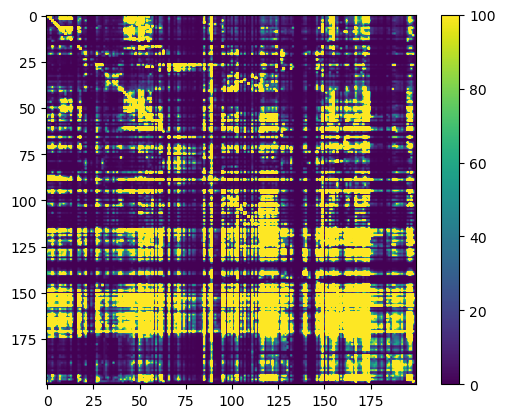

In [86]:
plt.imshow(grouped_iot1995,vmax=100)
plt.colorbar()
plt.show()

In [87]:
np.linalg.norm(temp - W @ H)

590.1512915189492

In [95]:
np.linalg.norm(temp - W[:,r:k] @ H[r:k,:])


290147.7337881436

In [11]:
permuted_iot1995 = iot1995.swaplevel('sector','region',axis = 0)
permuted_iot1995 = permuted_iot1995.swaplevel('sector','region',axis = 1)

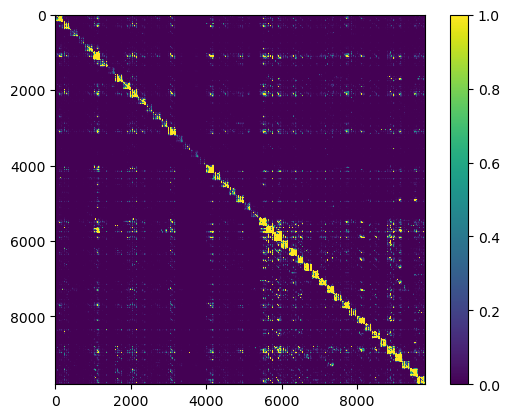

In [12]:
plt.imshow(permuted_iot1995,vmax=1)
plt.colorbar()
plt.show()

In [15]:
sorted_iot1995 = iot1995.sort_index(level = 'sector',axis = 0)
sorted_iot1995 = sorted_iot1995.sort_index(level = 'sector',axis = 1)

In [3]:
# plt.figure(figsize=(15, 15))
# plt.imshow(sorted_iot1995.iloc[:,:200],vmax=1)
# plt.colorbar()
# plt.show()

In [17]:
sorted_iot1995.iloc[:10,:10]

,region,AT,AU,BE,BG,BR,CA,CH,CN,CY,CZ
,sector,Additives/Blending Components,Additives/Blending Components,Additives/Blending Components,Additives/Blending Components,Additives/Blending Components,Additives/Blending Components,Additives/Blending Components,Additives/Blending Components,Additives/Blending Components,Additives/Blending Components
region,sector,,,,,,,,,,
AT,Additives/Blending Components,2.729295e-06,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,0.000000
AU,Additives/Blending Components,0.000000e+00,0.000011,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,0.000000
BE,Additives/Blending Components,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,0.000000
BG,Additives/Blending Components,0.000000e+00,0.000000,0.000000e+00,4.707175e-06,0.000000,0,0,0,0,0.000000
BR,Additives/Blending Components,2.756826e-07,0.000001,7.653669e-10,0.000000e+00,17.770259,0,0,0,0,0.000000
CA,Additives/Blending Components,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,0.000000
CH,Additives/Blending Components,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,0.000000
CN,Additives/Blending Components,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0,0,0,0,0.000000


In [26]:
# spectra = np.linalg.svd(sorted_iot1995.iloc[:,:200],compute_uv=False)
spectra = np.linalg.svd(sorted_iot1995,compute_uv=False)

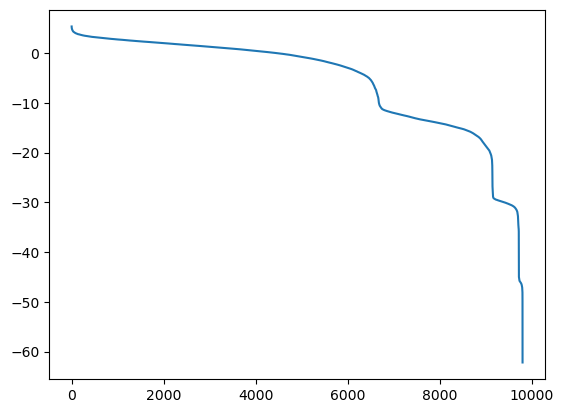

In [27]:
plt.plot(np.log10(spectra))

In [37]:
np.save('iot1995_spectra',spectra)

In [4]:
spectra = np.load('iot1995_spectra.npy')

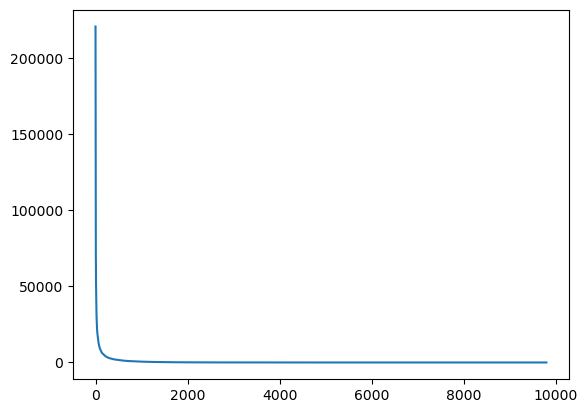

In [5]:
plt.plot(spectra)

In [9]:
spectra_sum = np.sum(spectra)
ratio = 0
acc = 0
i = 0
while ratio < 0.90 and i < 9801:
    acc = acc + spectra[i]
    ratio = acc/spectra_sum
    i = i + 1

In [10]:
i

741

In [11]:
ratio

0.9001213622410709

In [3]:
import pymrio as pm
import pandas as pd
import numpy as np

In [28]:

# Define multi-index for rows
row_arrays = [
    ['A', 'A', 'A', 'B', 'B', 'B'],
    ['one', 'two', 'three', 'one', 'two', 'three']
]
row_index = pd.MultiIndex.from_arrays(row_arrays, names=('sector', 'number'))

# Define multi-index for columns
col_arrays = [
    ['alpha', 'beta', 'alpha', 'beta']
]
# col_index = pd.MultiIndex.from_arrays(col_arrays, names=('consumer'))

# Create the DataFrame
data = [
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16],
    [17, 18, 19, 20],
    [21, 22, 23, 24]
]

df = pd.DataFrame(data, index=row_index, columns=col_arrays)

print("Multi-Index DataFrame:")
print(df)


Multi-Index DataFrame:
              alpha beta alpha beta
sector number                      
A      one        1    2     3    4
       two        5    6     7    8
       three      9   10    11   12
B      one       13   14    15   16
       two       17   18    19   20
       three     21   22    23   24


In [17]:
# out = pm.calc_accounts(S,L,Y)
pm.tools.ioutil.diagonalize_columns_to_sectors(df)

NotImplementedError: isna is not defined for MultiIndex

In [18]:
df

sector            A          B     
kind          alpha beta alpha beta
sector number                      
A      one        1    2     3    4
       two        5    6     7    8
       three      9   10    11   12
B      one       13   14    15   16
       two       17   18    19   20
       three     21   22    23   24

In [44]:
# Y = pd.read_csv(path_to_data + 'IOT_1995_pxp/Y.txt', header = [0,1], index_col = [0,1], sep='\t')
# Y = Y.groupby(level = 'category', axis = 1).sum()

F_Y = pd.read_csv(path_to_data + 'IOT_1995_pxp/satellite/F_Y.txt', header = [0,1], index_col = [0,1], sep='\t')
# F_Y = F_Y.groupby(level = 'category', axis = 0).sum()

/tmp/ipykernel_67575/3820034211.py:5: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  F_Y = F_Y.groupby(level = 'category', axis = 0).sum()


KeyError: 'Level category not found'

In [47]:
pm.tools.ioutil.diagonalize_columns_to_sectors(F_Y)

KeyError: 'Level sector not found'

In [46]:
# pm.tools.ioutil.diagonalize_columns_to_sectors(df)

In [39]:
F = pd.read_csv(path_to_data + 'IOT_1995_pxp/satellite/F.txt', header = [0,1], sep='\t')


In [40]:
F


region         AT  \
                                                 sector Paddy rice   
0                                              stressor        NaN   
1     Taxes less subsidies on products purchased: Total        0.0   
2                         Other net taxes on production        0.0   
3     Compensation of employees; wages, salaries, & ...        0.0   
4     Compensation of employees; wages, salaries, & ...        0.0   
...                                                 ...        ...   
1109                            Energy Carrier Net TMAR        0.0   
1110                            Energy Carrier Net TOTH        0.0   
1111                            Energy Carrier Net TRAI        0.0   
1112                            Energy Carrier Net TROA        0.0   
1113                            Energy Carrier Net LOSS        0.0   

                                                                       \
           Wheat Cereal grains nec Vegetables, fruit, nuts  Oil seeds   
0            NaN               NaN                     NaN        NaN   
1       3.121787          6.497150                5.222836   0.722632   
2      -0.016339         -0.035586               -0.064576  -0.007783   
3       0.847667          1.688767                3.306135   0.199297   
4      19.932371         39.710329               77.741757   4.686340   
...          ...               ...                     ...        ...   
1109    0.000000          0.000000                0.000000   0.000000   
1110    0.000000          0.000000                0.000000   0.000000   
1111    0.000000          0.000000                0.000000   0.000000   
1112  429.117600        108.333878              273.992887  14.022371   
1113    0.000000          0.000000                0.000000   0.000000   

                                                                       ...  \
     Sugar cane, sugar beet Plant-based fibers  Crops nec      Cattle  ...   
0                       NaN                NaN        NaN         NaN  ...   
1                  0.531265           0.000279   1.630903    8.638617  ...   
2                 -0.003398          -0.000004  -0.008334   -0.191489  ...   
3                  0.213633           0.000285   0.316284    1.461825  ...   
4                  5.023456           0.006710   7.437227   34.373912  ...   
...                     ...                ...        ...         ...  ...   
1109               0.000000           0.000000   0.000000    0.000000  ...   
1110               0.000000           0.000000   0.000000    0.000000  ...   
1111               0.000000           0.000000   0.000000    0.000000  ...   
1112              39.986477           0.000000  28.320104  138.057031  ...   
1113               0.000000           0.000000   0.000000    0.000000  ...   

                                WM                                        \
     Paper for treatment: landfill Plastic waste for treatment: landfill   
0                              NaN                                   NaN   
1                         9.198719                              5.283218   
2                         3.357555                              1.615982   
3                         4.150417                              2.263071   
4                        45.464784                             23.749960   
...                            ...                                   ...   
1109                     54.602111                             53.409612   
1110                      0.000000                              0.000000   
1111                      0.000000                              0.000000   
1112                    316.406320                            261.188515   
1113                    730.142370                            803.597162   

                                                          \
     Inert/metal/hazardous waste for treatment: landfill   
0                                                   NaN    
1   

In [41]:
D_cba = pd.read_csv(path_to_data + 'IOT_1995_pxp/satellite/D_cba.txt', header = [0,1], sep='\t')


In [42]:
D_cba

region         AT             \
                                                 sector Paddy rice      Wheat   
0                                              stressor        NaN        NaN   
1     Taxes less subsidies on products purchased: Total   0.001032   0.956412   
2                         Other net taxes on production   0.000655   0.284681   
3     Compensation of employees; wages, salaries, & ...   0.001599   0.394749   
4     Compensation of employees; wages, salaries, & ...   0.012742   6.225865   
...                                                 ...        ...        ...   
1109                            Energy Carrier Net TMAR   0.001961   1.553544   
1110                            Energy Carrier Net TOTH   0.002149   2.060018   
1111                            Energy Carrier Net TRAI   0.000379   0.802576   
1112                            Energy Carrier Net TROA   0.862843  78.658969   
1113                            Energy Carrier Net LOSS   0.136051  95.970974   

                                                           \
     Cereal grains nec Vegetables, fruit, nuts  Oil seeds   
0                  NaN                     NaN        NaN   
1             3.554381               29.097143   0.358692   
2             1.248185               13.929680   0.060225   
3             1.461129               14.322403   0.193882   
4            21.454784              198.476975   2.895378   
...                ...                     ...        ...   
1109          7.117517               36.076303   0.937990   
1110         10.679157               42.624759   0.913287   
1111          2.677352               10.418189   0.467634   
1112         63.831102              426.546282   7.381841   
1113        410.894737             2026.610016  36.023417   

                                                                        ...  \
     Sugar cane, sugar beet Plant-based fibers   Crops nec      Cattle  ...   
0                       NaN                NaN         NaN         NaN  ...   
1                  0.120657           3.205648    9.985481    3.165502  ...   
2                  0.051049           1.978540    3.035276    0.953913  ...   
3                  0.080251           1.664038    6.569404    1.618582  ...   
4                  1.241977          12.234875   40.662264   22.027450  ...   
...                     ...                ...         ...         ...  ...   
1109               0.302415          16.727916   12.640242    3.945204  ...   
1110               0.316459          39.656627   10.980112    3.634471  ...   
1111               0.196177           5.970417    2.111430    2.221730  ...   
1112               5.022534         150.905872  107.635567   53.202934  ...   
1113              11.124011         719.139741  374.411953  247.492774  ...   

                                WM                                        \
     Paper for treatment: landfill Plastic waste for treatment: landfill   
0                              NaN                                   NaN   
1                        19.422077                             11.436858   
2                         6.399988                              3.638728   
3                         5.846375                              3.418728   
4                        57.179851                             32.554508   
...                            ...                                   ...   
1109                    236.548363                            194.308395   
1110                     11.355196                              6.631111   
1111                      3.467382                              1.297332   
1112                    616.623637                            415.052211   
1113                   2316.905056                           1575.673244   

                                                          \
     Inert/metal/hazardous waste for treatment: landfill   
0                                                   NaN    
1   